In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

Need to remove the unusable and redundant columns

In [13]:
df = pd.read_csv('all_seasons.csv', index_col=0)
df.reset_index(inplace=True, drop = True)
df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,poss_y,attendance,captain,formation,referee,match report_y,notes,team,season,xg
0,14/09/2020,20:15,Premier League,Matchweek 1,Mon,Away,W,3,1,Brighton,...,48.0,NaN,Jorginho,4-2-2-2,Craig Pawson,Match Report,NaN,Chelsea,2020-2021,NaN
1,20/09/2020,16:30,Premier League,Matchweek 2,Sun,Home,L,0,2,Liverpool,...,39.0,NaN,Jorginho,4/03/2003,Paul Tierney,Match Report,NaN,Chelsea,2020-2021,NaN
2,23/09/2020,19:45,EFL Cup,Third round,Wed,Home,W,6,0,Barnsley,...,69.0,NaN,César Azpilicueta,4-2-3-1,Darren Bond,Match Report,NaN,Chelsea,2020-2021,NaN
3,26/09/2020,17:30,Premier League,Matchweek 3,Sat,Away,D,3,3,West Brom,...,75.0,NaN,Thiago Silva,4-2-3-1,Jonathan Moss,Match Report,NaN,Chelsea,2020-2021,NaN
4,29/09/2020,19:45,EFL Cup,Fourth round,Tue,Away,D,1 (4),1 (5),Tottenham,...,63.0,NaN,César Azpilicueta,4-2-3-1,Lee Mason,Match Report,Tottenham won on penalty kicks following extra...,Chelsea,2020-2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,18/01/2023,20:00,Premiership,Regular season,Wed,Away,W,3,2,Kilmarnock,...,78.0,8461.0,James Tavernier,4-2-3-1,Kevin Clancy,Match Report,NaN,Rangers,2022-2023,NaN
4021,28/01/2023,15:00,Premiership,Regular season,Sat,Home,W,2,0,St Johnstone,...,69.0,49672.0,James Tavernier,4-2-3-1,William Collum,Match Report,NaN,Rangers,2022-2023,NaN
4022,1/02/2023,19:45,Premiership,Regular season,Wed,Away,W,3,0,Hearts,...,51.0,18330.0,James Tavernier,4-2-3-1,John Beaton,Match Report,NaN,Rangers,2022-2023,NaN
4023,4/02/2023,15:00,Premiership,Regular season,Sat,Home,W,2,1,Ross County,...,70.0,49115.0,James Tavernier,4-2-3-1,Euan Anderson,Match Report,NaN,Rangers,2022-2023,NaN


In [14]:
cols_todel = ['ga','match report_x','match report_y','date_opp','time_opp','comp_opp','round_opp','day_opp','venue_opp','result_opp','ga_opp','opponent_opp','xg', 'match report_opp','poss_y', 'comp', 'captain','referee','notes', 'attendance','formation']
df.drop(cols_todel, axis=1, inplace=True)
df.shape

(4025, 215)

gf = gols for
ga = goals against
gf_opp = goals or the opponent
ga_opp = goals against the opponent. 

poss = possession, it has got x, y in the merging, will drop one and use the other. 

Will remove ga and ga_opp as the columns are redundant. 

Some gf and gf_opp parts have "()" in them for aggregate score. I will have to ensure they are processed correctly, I will take the value outside of the parenthesis, as that is the match sore.

In [15]:
df.loc[df["gf"].str.contains(" "),'gf'] = df["gf"].str[0] # if the Score column starts with "(", then grab the first from left char.
df.loc[df["gf_opp"].str.contains(" "),'gf_opp'] = df["gf_opp"].str[0]

df.head(5)

,date,time,round,day,venue,result,gf,opponent,gls,sh,...,pkwon_opp,pkcon_opp,og_opp,recov_opp,won_opp,won%_opp,xg_y,xga,team,season
0,14/09/2020,20:15,Matchweek 1,Mon,Away,W,3,Brighton,3.0,9.0,...,0.0,1.0,0.0,54.0,10.0,43.5,1.2,1.1,Chelsea,2020-2021
1,20/09/2020,16:30,Matchweek 2,Sun,Home,L,0,Liverpool,0.0,4.0,...,0.0,1.0,0.0,53.0,3.0,21.4,0.9,2.1,Chelsea,2020-2021
2,23/09/2020,19:45,Third round,Wed,Home,W,6,Barnsley,6.0,17.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Chelsea,2020-2021
3,26/09/2020,17:30,Matchweek 3,Sat,Away,D,3,West Brom,3.0,22.0,...,0.0,0.0,0.0,48.0,11.0,39.3,2.0,0.6,Chelsea,2020-2021
4,29/09/2020,19:45,Fourth round,Tue,Away,D,1,Tottenham,1.0,7.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Chelsea,2020-2021


## Encoding string columns

In [16]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
df["venue_code"] = df["venue"].astype("category").cat.codes
df["opp_code"] = df["opponent"].astype("category").cat.codes
df["hour"] = df["time"].str.replace(":.+", "", regex=True).astype("int")
df["day_code"] = df["date"].dt.dayofweek
df.head()

,date,time,round,day,venue,result,gf,opponent,gls,sh,...,won_opp,won%_opp,xg_y,xga,team,season,venue_code,opp_code,hour,day_code
0,2020-09-14,20:15,Matchweek 1,Mon,Away,W,3,Brighton,3.0,9.0,...,10.0,43.5,1.2,1.1,Chelsea,2020-2021,0,66,20,0
1,2020-09-20,16:30,Matchweek 2,Sun,Home,L,0,Liverpool,0.0,4.0,...,3.0,21.4,0.9,2.1,Chelsea,2020-2021,1,217,16,6
2,2020-09-23,19:45,Third round,Wed,Home,W,6,Barnsley,6.0,17.0,...,NaN,NaN,NaN,NaN,Chelsea,2020-2021,1,45,19,2
3,2020-09-26,17:30,Matchweek 3,Sat,Away,D,3,West Brom,3.0,22.0,...,11.0,39.3,2.0,0.6,Chelsea,2020-2021,0,408,17,5
4,2020-09-29,19:45,Fourth round,Tue,Away,D,1,Tottenham,1.0,7.0,...,NaN,NaN,NaN,NaN,Chelsea,2020-2021,0,369,19,1


## Missing Data
Deleting rows that are missing a lot of stats. Already have very high dimensionality, and not enough data or this many dimensions, so wil remove some of the stat columns. Let us have a visual on the missing values in all the columns. 

(4025, 219)

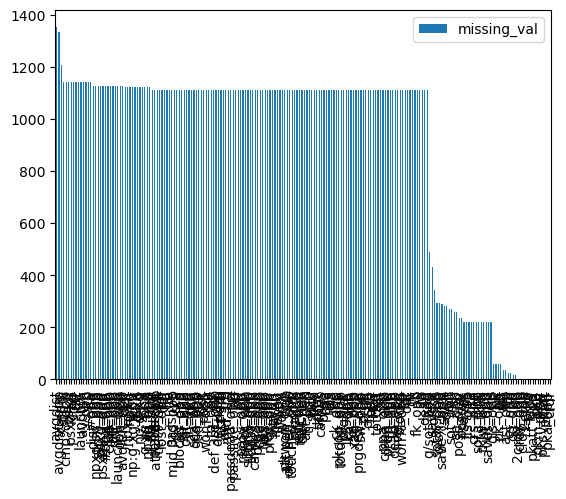

In [17]:
missing = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
missing.rename(columns={0:'missing_val'}, inplace=True)
missing[missing['missing_val']>0].plot.bar()

df.shape

We can see that the number of missing values drops down in a step function. So we delete the columns that have over 300 missing values and the rows for anything less than that. This is the sweet spot as deleting more columns or rows will impact the quality of our data. 
Also, the relationship between various features in football matches is highly (e.g the opponent team) so imputation is not the answer here as it may affect the quality of the data too much.

In [18]:
cols_todel = missing[missing['missing_val']>300].index
df.drop(list(cols_todel), axis=1, inplace=True)
df.shape

(4025, 64)

Of course if one is interested, one can use these columns with the rows that have them, but I choose to have lower dimensionality and more data rows. 

In [19]:
df = df.dropna(axis = 0) #drop rows with missing values
# df = df.reset_index(drop=True)
df.shape # and no missing values.

(3643, 64)

Everything that has to be numeric is already numeric. Let us make a target variable first.

## Setting up the target column

In [20]:
df['result'].value_counts()

W    2089
L     813
D     741
Name: result, dtype: int64

As can be seen from above, the result column is not balanced. Also, according to our brief of predicting if the game is going ot be a win or "not", we will have a binary target column, the result is either a win or loss. Te reason the number of wins is a lot higher than the losses and draws is that these tea have qualified for the Champions League. The qualifying teams win the majority of their games in the domestic leagues as well. 

In [21]:
df = df.sort_values("date")
#df['season'] = df['season'].str[0:4].astype('int')
#del df['index']
df=df.reset_index(drop=True)

In [22]:
df.groupby(["venue"]).apply(lambda x: x[x["result"] == 'W'].shape[0]/ x.shape[0])

venue
Away       0.526864
Home       0.622284
Neutral    0.458333
dtype: float64

In [23]:
df.venue.value_counts() # this is not balanced. Have to drop the venues that are neutral. It is only 24 rows. 

Away       1824
Home       1795
Neutral      24
Name: venue, dtype: int64

In [24]:
df = df.loc[df['venue']!='Neutral'] # dropping venue = neutral. 

In [25]:
df.groupby(["venue"]).apply(lambda x: x[x["result"] == 'W'].shape[0]/ x.shape[0]) # So in %62 of the cases, the team wins their home games, as opposed to onl 52% of their away games. 
# This is our benchmark.

venue
Away    0.526864
Home    0.622284
dtype: float64

In [26]:
df['target'] = (df['result'] == "W").astype("int")

# Prediction Using Machine Learning

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
predictors = ["venue_code", "opp_code", "hour", "day_code"] # initial predictors. 

In [29]:
rf = RandomForestClassifier(n_estimators=500, min_samples_split=40, random_state=1, class_weight='balanced')

train = df[df['date']< "2022-04-16"] # Using 70% of the rows for training and 30% for testing. cannot do splits since we cannot use future data to predict past games. 
test = df[df['date']> "2022-04-16"]

rf.fit(train[predictors],train['target'])

predictions = rf.predict(test[predictors])

print(train.shape)
print(test.shape)

accuracy_score(test["target"],predictions)

print('accuracy_score =' ,accuracy_score(test["target"],predictions))

(2503, 65)
(1105, 65)
accuracy_score = 0.5846153846153846


Accuracy score here is not a good measure, we use precision score as we have false positives and false negatives. 0 is a loss and 1 is a win. 

In [30]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=predictions))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,237,223
1,236,409


In [31]:
from sklearn.metrics import precision_score

precision_score(test["target"], predictions, average = None)

array([0.50105708, 0.6471519 ])

In [32]:
precision_score(test["target"], predictions, average = 'weighted')

0.5863341471598758

#### Feature engineering
We need to use the rest of the statistics we have to see if we can improve our model. Hence we introduce rolling averages of statistics from previous games as prediction metrics.

In [33]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(5,closed="left").mean() # To avoid data leakage from future matches
    group[new_cols] = rolling_stats
    group = group.dropna(subset = new_cols)
    return group

In [63]:
def make_predictions(data, predictors):
    rf = RandomForestClassifier(n_estimators=500, min_samples_split=2, random_state=1,  max_depth=6)

    train = data[data['date']< "2022-04-16"] # Data in order of date use 70% for training
    test = data[data['date']> "2022-04-16"]

    rf.fit(train[predictors],train['target'])

    predictions = rf.predict(test[predictors])

    combined = pd.DataFrame(dict(actual=test["target"], predicted=predictions))

    precision_weight = precision_score(test["target"], predictions, average = 'weighted')
    precision_raw = precision_score(test["target"], predictions, average = None)

    return combined, precision_weight, precision_raw, rf.feature_importances_, rf

In [52]:
cols = ['gls','gls_opp','gf','gf_opp','sh', 'sot','g/sh','save%_opp','tkl+int','poss_x'] # Choosing based on domain knowledge.
new_cols = [f"{c}_rolling" for c in cols] # add_rolling to column names

df_rolling = df.groupby('team').apply(lambda x: rolling_averages(x,cols,new_cols))
df_rolling = df_rolling.droplevel('team')

combined, precision_weight, precision_raw, importances = make_predictions (df_rolling, predictors+new_cols)

print(precision_raw)
print(precision_weight)

[0.6146789  0.63657957]
0.6274887268992405


We are already over the benchmark with the above stats. 

In [36]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,134,306
1,84,536


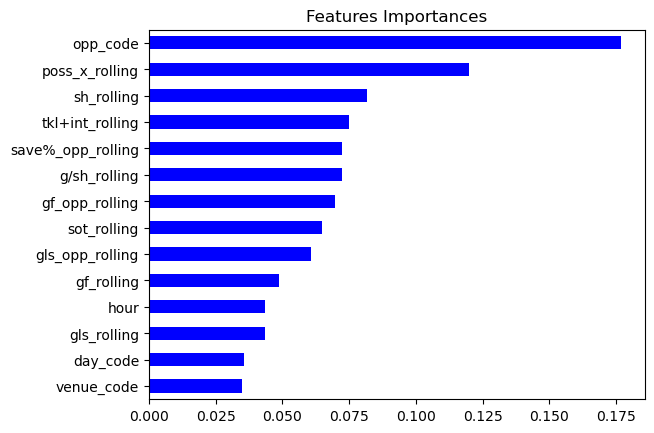

In [37]:
importance = pd.Series(data=importances,
                        index=  predictors+new_cols)
# Sort importances
importances_sorted = importance.sort_values()
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='blue')
plt.title('Features Importances')
plt.show()

Using the sequential feature selection to see if we can improve the score. 

In [38]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit


split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(rf, 
                                n_features_to_select=20, 
                                direction="forward",
                                cv=split,
                                n_jobs=1
                               )

In [39]:
predictors

['venue_code', 'opp_code', 'hour', 'day_code']

In [53]:
cols = ['gf',
       'gls', 'sh', 'sot', 'sot%', 'g/sh', 'pk', 'pkatt', 'gf_opp', 'gls_opp',
       'sh_opp', 'sot_opp', 'sot%_opp', 'g/sh_opp', 'pk_opp', 'pkatt_opp',
       'sota', 'saves', 'cs', 'pka', 'pksv', 'pkm', 'sota_opp', 'saves_opp',
       'save%_opp', 'cs_opp', 'pka_opp', 'pksv_opp', 'pkm_opp', 'ast',
       'ast_opp', 'crs', 'crs_opp', 'tklw', 'int', 'tkl+int', 'tklw_opp',
       'int_opp', 'tkl+int_opp', 'poss_x', 'poss_opp', 'crdy', 'crdr', '2crdy',
       'fls', 'og', 'crdy_opp', 'crdr_opp', '2crdy_opp', 'fls_opp', 'og_opp',
       ]

new_cols = [f"{c}_rolling" for c in cols] # add_rolling to column names

df_rolling = df.groupby('team').apply(lambda x: rolling_averages(x,cols,new_cols))
df_rolling = df_rolling.droplevel('team')

In [162]:
sfs.fit(df_rolling[predictors+new_cols], df_rolling["target"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RandomForestClassifier(class_weight='balanced',
                                                           min_samples_split=40,
                                                           n_estimators=500,
                                                           random_state=1),
                          n_features_to_select=20, n_jobs=1)

In [41]:
selected_cols = predictors+new_cols

In [324]:
predictors2 = [b for a, b in zip(sfs.get_support(), selected_cols) if a]

In [54]:
predictors2

['venue_code',
 'opp_code',
 'g/sh_rolling',
 'pkatt_rolling',
 'pkatt_opp_rolling',
 'pksv_rolling',
 'pkm_rolling',
 'cs_opp_rolling',
 'pksv_opp_rolling',
 'pkm_opp_rolling',
 'ast_rolling',
 'tkl+int_rolling',
 'crdy_rolling',
 'crdr_rolling',
 '2crdy_rolling',
 'og_rolling',
 'crdy_opp_rolling',
 'crdr_opp_rolling',
 '2crdy_opp_rolling',
 'og_opp_rolling']

In [55]:
predictors2=['venue_code','opp_code','g/sh_rolling','pkatt_rolling','pkatt_opp_rolling','pksv_rolling','pkm_rolling','cs_opp_rolling',
 'pksv_opp_rolling','pkm_opp_rolling','ast_rolling','tkl+int_rolling','crdy_rolling','crdr_rolling','2crdy_rolling','og_rolling',
 'crdy_opp_rolling','crdr_opp_rolling','2crdy_opp_rolling','og_opp_rolling']

In [56]:
combined, precision_weight, precision_raw, importances = make_predictions (df_rolling, predictors2)

print(precision_raw)
print(precision_weight)

[0.60638298 0.62614679]
0.6179429432194432


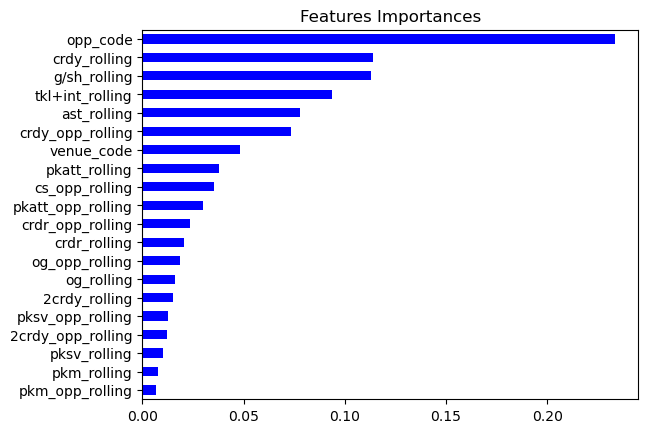

In [57]:
importance = pd.Series(data=importances,
                        index=  predictors2)
# Sort importances
importances_sorted = importance.sort_values()
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='blue')
plt.title('Features Importances')
plt.show()

In [58]:
data ={'imp_vals':importances}
imp_df = pd.DataFrame(data=data, index=predictors2)
imp_df.sort_values(by = 'imp_vals')

,imp_vals
pkm_opp_rolling,0.006979
pkm_rolling,0.007591
pksv_rolling,0.010317
2crdy_opp_rolling,0.012046
pksv_opp_rolling,0.012893
2crdy_rolling,0.015355
og_rolling,0.016183
og_opp_rolling,0.018371
crdr_rolling,0.020527
crdr_opp_rolling,0.023570


In [59]:
predictors3 = imp_df.loc[imp_df['imp_vals']>0.01].index # Selecting from the chosen features, and removing the east important ones. 

In [60]:
predictors3

Index(['venue_code', 'opp_code', 'g/sh_rolling', 'pkatt_rolling',
       'pkatt_opp_rolling', 'pksv_rolling', 'cs_opp_rolling',
       'pksv_opp_rolling', 'ast_rolling', 'tkl+int_rolling', 'crdy_rolling',
       'crdr_rolling', '2crdy_rolling', 'og_rolling', 'crdy_opp_rolling',
       'crdr_opp_rolling', '2crdy_opp_rolling', 'og_opp_rolling'],
      dtype='object')

In [64]:
combined, precision_weight, precision_raw, importances,rf = make_predictions (df_rolling, predictors3)

print(precision_raw)
print(precision_weight)

[0.6142132  0.63035921]
0.6236570929983108


In [65]:
df.groupby(["venue"]).apply(lambda x: x[x["result"] == 'W'].shape[0]/ x.shape[0]) # So 52% of the home games are won. 

venue
Away    0.526864
Home    0.622284
dtype: float64

Hence we have beaten the benchmark using selected features. 

In [62]:
import pickle

In [ ]:
appData = [predictors3, df_rolling, rf]
pickle.dump(appData,open('appData.pkl','wb'))

#### Useful stuff
Do the following to get a list of the numeric columns, or select an type of column based on its tpes. 

```[key for key in dict(DF.dtypes) if dict(DF.dtypes)[key] in ['float64', 'int64']]```